In [3]:
import pandas as pd
import os 
import numpy as np
os.path.dirname(os.path.realpath('train.csv'))
from datetime import datetime
from datetime import timedelta  
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
import numpy  as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib
from matplotlib import pylab as plt

In [67]:
dataFileUrl = r'/home/jovyan/data1030-student-f19/project1030/train.csv'
bnb = pd.read_csv(dataFileUrl, parse_dates = ['last_review', 'host_since', 'first_review' ])
bnb1=bnb.drop(columns=['description'],inplace=False)

res=[]
for i in range(len(bnb1['host_response_rate'])):
    if type(bnb1['host_response_rate'][i]) is not float:
        res.append(float(bnb1['host_response_rate'][i][:-1]))
    else:
        res.append(bnb1['host_response_rate'][i])

bnb1['host_response_rate']=res

bnb1 = bnb1[np.isfinite(bnb1['review_scores_rating'])]
bnb2 = bnb1[bnb1.host_has_profile_pic.notnull()] 
bnb3 = bnb2[bnb2.host_identity_verified.notnull()]
bnb3 = bnb2[bnb2.first_review.notnull()]
bnb3 = bnb2[bnb2.last_review.notnull()]



len(bnb3['id'].unique())
type(bnb3['host_since'][0])
type(bnb3['last_review'][0])
type(bnb3['last_review'][0]-bnb3['last_review'][1])
a=max(bnb3['last_review'])
bnb3['last_review'].fillna(a+timedelta(days=1))
bnb3['zipcode'] = bnb3['zipcode'].fillna('missing')
res1=[]
for i in bnb3['last_review']:
    res1.append(i-a-timedelta(days=1))
bnb3['last_review']=res1
#bnb3['last_review']


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [5]:
a=[]
for i in bnb3['beds']:
    if i >=0:
        a.append(int(i))
    else:
        a.append(i)
a
bnb3['beds']=a     

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
import seaborn as sns

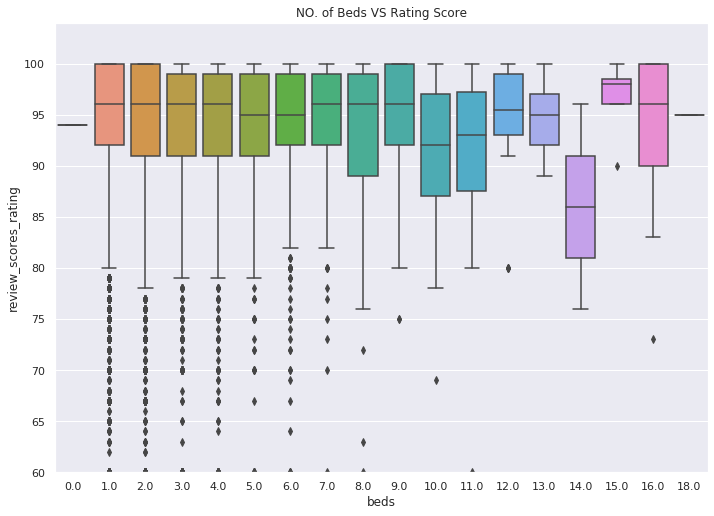

In [62]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

some = bnb3[['review_scores_rating','beds']]
sns.boxplot(some['beds'], some['review_scores_rating'])#.boxplot(by = 'beds')
plt.ylabel('review_scores_rating')
plt.ylim(60,None)
plt.savefig('bedsvsratingsboxplot.png',dpi=300)
plt.title('NO. of Beds VS Rating Score')
plt.show()

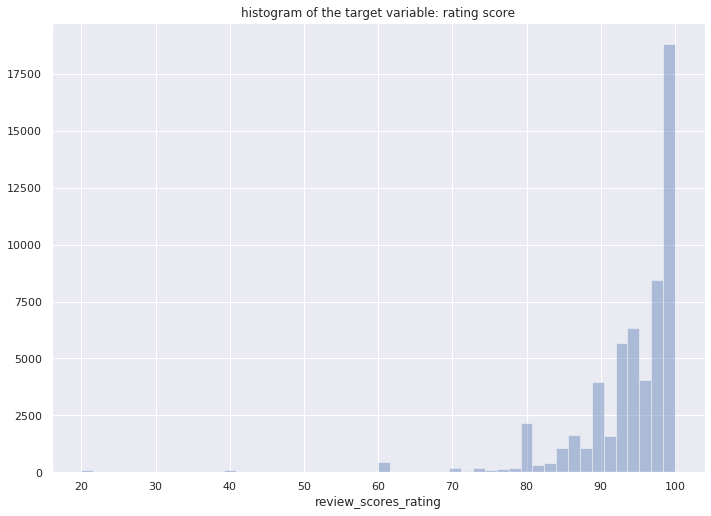

In [7]:
sns.distplot(bnb3['review_scores_rating'], kde = False)
plt.title('histogram of the target variable: rating score')
plt.savefig('y_hist.png',dpi=300)
plt.show()

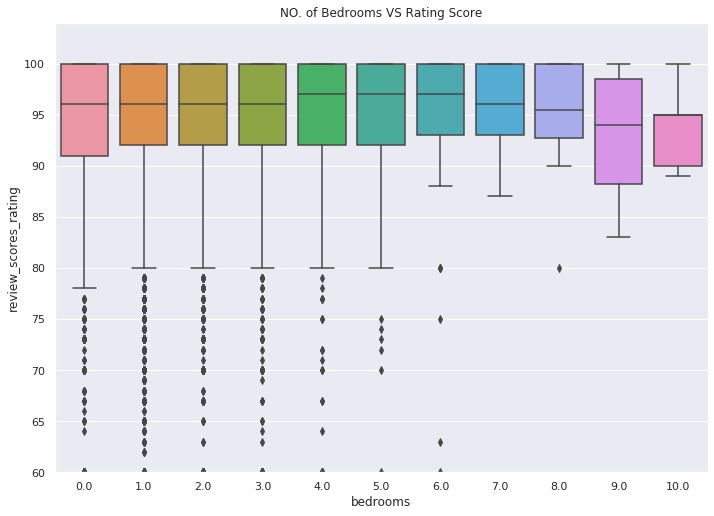

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

some = bnb3[['review_scores_rating','bedrooms']]
sns.boxplot(some['bedrooms'], some['review_scores_rating'])#.boxplot(by = 'beds')
plt.ylabel('review_scores_rating')
plt.ylim(60,None)
plt.savefig('bedroomsvsratingsboxplot.png',dpi=300)
plt.title('NO. of Bedrooms VS Rating Score')
plt.show()

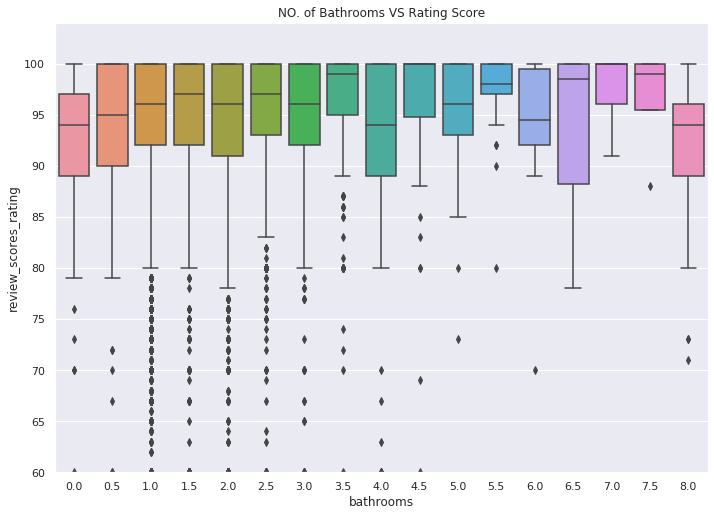

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

some = bnb3[['review_scores_rating','bathrooms']]
sns.boxplot(some['bathrooms'], some['review_scores_rating'])#.boxplot(by = 'beds')
plt.ylabel('review_scores_rating')

plt.title('NO. of Bathrooms VS Rating Score')
plt.ylim(60,None)
plt.savefig('bathroomsvsratingsboxplot.png',dpi=300)
plt.show()

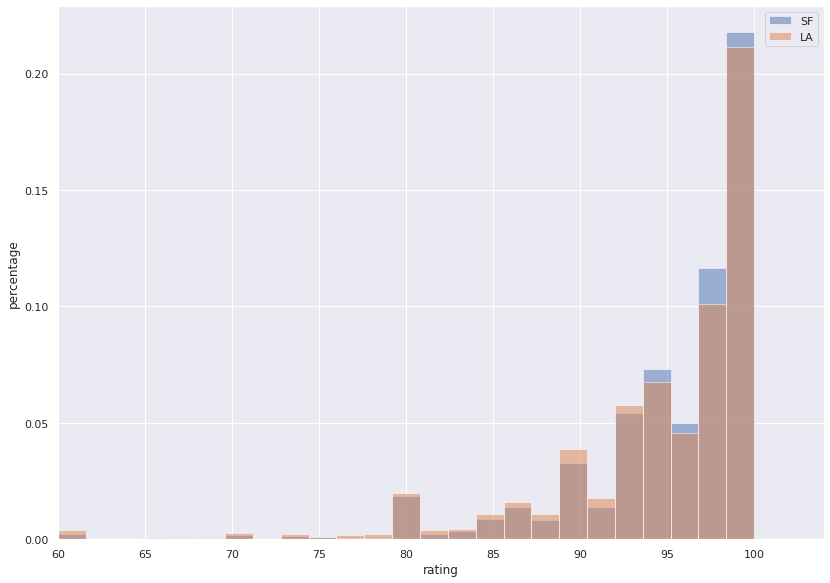

In [8]:
categories = ['SF','LA']
bin_range = (bnb3['review_scores_rating'].min(),bnb3['review_scores_rating'].max())

for c in categories:
    plt.hist(bnb3[bnb3['city']==c]['review_scores_rating'],alpha=0.5,label=c,range=bin_range,bins=50,density=True)
plt.legend()
plt.ylabel('percentage')
plt.xlabel('rating')
plt.xlim(60,None)
plt.tight_layout()
plt.savefig('LASFcityhisto.png',dpi=300)
plt.show()


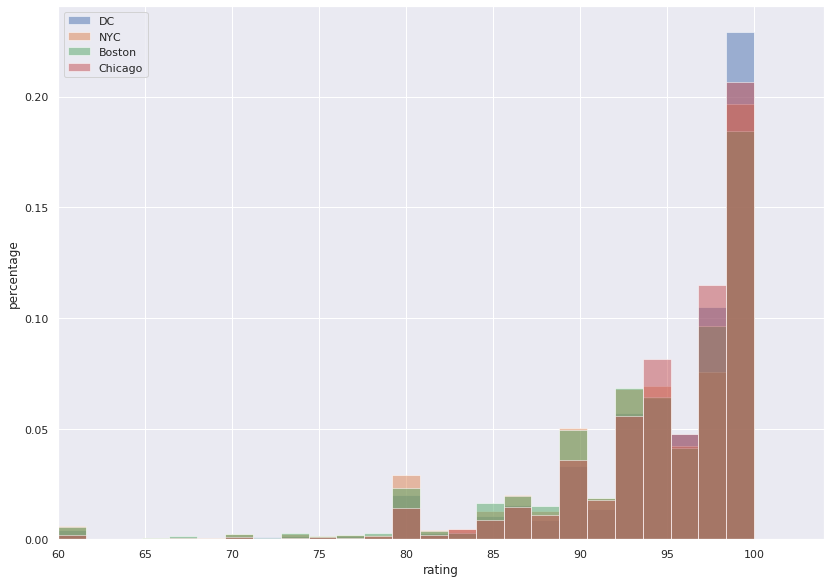

In [9]:
categories = ['DC','NYC','Boston','Chicago']
bin_range = (bnb3['review_scores_rating'].min(),bnb3['review_scores_rating'].max())

for c in categories:
    plt.hist(bnb3[bnb3['city']==c]['review_scores_rating'],alpha=0.5,label=c,range=bin_range,bins=50,density=True)
plt.legend()
plt.ylabel('percentage')
plt.xlabel('rating')
plt.xlim(60,None)
plt.tight_layout()
plt.savefig('eastcityhisto.png',dpi=300)
plt.show()

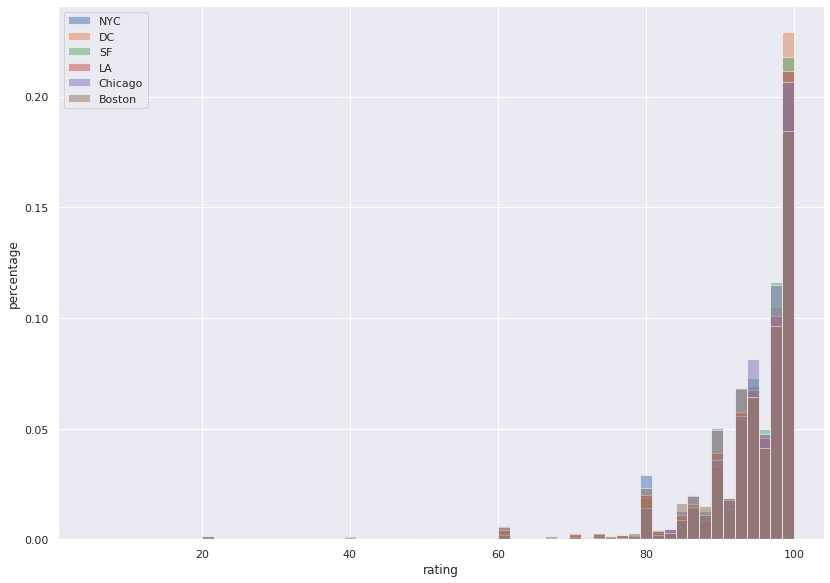

In [11]:
categories = bnb3['city'].unique()
bin_range = (bnb3['review_scores_rating'].min(),bnb3['review_scores_rating'].max())

for c in categories:
    plt.hist(bnb3[bnb3['city']==c]['review_scores_rating'],alpha=0.5,label=c,range=bin_range,bins=50,density=True)
plt.legend()
plt.ylabel('percentage')
plt.xlabel('rating')
plt.xlim(0.6,None)
plt.tight_layout()
plt.savefig('cityhisto.png',dpi=300)
plt.show()

In [8]:
print(type(bnb['first_review'][0]))
print(type(bnb3['host_since'][0]))
type(bnb3['last_review'][0])
res=[]


<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [9]:
b=max(bnb3['first_review'])
bnb3['first_review'].fillna(b+pd.DateOffset(days=1))
res2=[]
for i in bnb3['first_review']:
    res2.append(i-b-timedelta(days=1))

In [10]:
bnb3['first_review']=res2

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
bnb3['first_review']=res2
bnb3['first_review'][0]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Timedelta('-475 days +00:00:00')

In [12]:
bnb3['diff_last_first_review']=bnb3['last_review']-bnb3['first_review']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
c=max(bnb3['host_since'])
bnb3['host_since'].fillna(c+pd.DateOffset(days=1))
res3=[]
for i in bnb3['host_since']:
    res3.append(i-b-timedelta(days=1))
bnb3['host_since']=res3

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
ssvar=['log_price','host_response_rate','accommodates','bathrooms','latitude','longitude','bedrooms','beds'] 
for i in ssvar:
    bnb3[i]= scaler.fit_transform(np.array(bnb3[i]).reshape(-1,1))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

In [15]:
new_bnb=bnb3[['review_scores_rating','log_price','host_response_rate','accommodates','bathrooms','latitude','longitude','bedrooms','beds']]
new_bnb.head()

,review_scores_rating,log_price,host_response_rate,accommodates,bathrooms,latitude,longitude,bedrooms,beds
0,100.0,0.659259,NaN,0.133333,0.125,0.812859,0.941928,0.1,0.055556
1,93.0,0.674951,1.0,0.400000,0.125,0.820547,0.941978,0.3,0.166667
2,92.0,0.654799,1.0,0.266667,0.125,0.825187,0.942857,0.1,0.166667
4,40.0,0.624300,1.0,0.066667,0.125,0.617213,0.882854,0.0,0.055556
5,100.0,0.584528,1.0,0.066667,0.125,0.487681,0.001591,0.1,0.055556


In [16]:
new_bnb = new_bnb.reset_index().iloc[:,1:]

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


X_train1 = bnb3[['property_type','room_type','bed_type','cancellation_policy','cleaning_fee','city', 'host_has_profile_pic','host_identity_verified','instant_bookable']]

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False,handle_unknown="ignore")
# fit the training data
foo = X_train1.dropna()
enc.fit(foo)

X_train_oe1 = enc.transform(foo)
colNames=list(enc.get_feature_names())
X_new1=pd.DataFrame(data=X_train_oe1,columns=colNames)
X_new1.shape
#bnb.shape[0]

(57247, 59)

In [18]:
ss = StandardScaler()
num_values = ss.fit_transform(bnb3[['first_review','last_review','diff_last_first_review']])
df_num = pd.DataFrame(data=num_values,columns = ['first_review','last_review','diff_last_first_review'])


In [19]:
num_values1 = ss.fit_transform(bnb3['number_of_reviews'].values.reshape(-1,1))
df_num1 = pd.DataFrame(data=num_values1,columns = ['number_of_reviews'])

In [20]:
result = pd.concat([new_bnb,df_num1,df_num,X_new1], axis = 1)
#result =new_bnb.append(X_new1)
result.head()
result.shape

(57247, 72)

In [21]:
imputer = IterativeImputer(estimator = RandomForestRegressor(),random_state=5)
X_impute1 = imputer.fit_transform(result[['bathrooms','host_response_rate','bedrooms','beds']])
#bnb3['bathrooms','host_response_rate','bedrooms','beds']=X_impute1
result[['bathrooms','host_response_rate','bedrooms','beds']]=pd.DataFrame(X_impute1)
result[['bathrooms','host_response_rate','bedrooms','beds']].head()


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

,bathrooms,host_response_rate,bedrooms,beds
0,0.125,0.949351,0.1,0.055556
1,0.125,1.000000,0.3,0.166667
2,0.125,1.000000,0.1,0.166667
3,0.125,1.000000,0.0,0.055556
4,0.125,1.000000,0.1,0.055556


In [22]:
result['bbratio']=result['beds']/result['bedrooms']

In [23]:
result.head()

,review_scores_rating,log_price,host_response_rate,accommodates,bathrooms,latitude,longitude,bedrooms,beds,number_of_reviews,...,x5_LA,x5_NYC,x5_SF,x6_f,x6_t,x7_f,x7_t,x8_f,x8_t,bbratio
0,100.0,0.659259,0.949351,0.133333,0.125,0.812859,0.941928,0.1,0.055556,-0.608116,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.555556
1,93.0,0.674951,1.000000,0.400000,0.125,0.820547,0.941978,0.3,0.166667,-0.510685,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.555556
2,92.0,0.654799,1.000000,0.266667,0.125,0.825187,0.942857,0.1,0.166667,-0.413255,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.666667
3,40.0,0.624300,1.000000,0.066667,0.125,0.617213,0.882854,0.0,0.055556,-0.559400,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,inf
4,100.0,0.584528,1.000000,0.066667,0.125,0.487681,0.001591,0.1,0.055556,-0.583758,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.555556


In [24]:
print(result.isnull().sum(axis=0)/bnb1.shape[0])

review_scores_rating    0.000000
log_price               0.000000
host_response_rate      0.000000
accommodates            0.000000
bathrooms               0.000000
                          ...   
x7_f                    0.000000
x7_t                    0.000000
x8_f                    0.000000
x8_t                    0.000000
bbratio                 0.000017
Length: 73, dtype: float64


In [25]:
y = bnb3['review_scores_rating']
print(y.describe())

count    57247.000000
mean        94.069436
std          7.832418
min         20.000000
25%         92.000000
50%         96.000000
75%        100.000000
max        100.000000
Name: review_scores_rating, dtype: float64


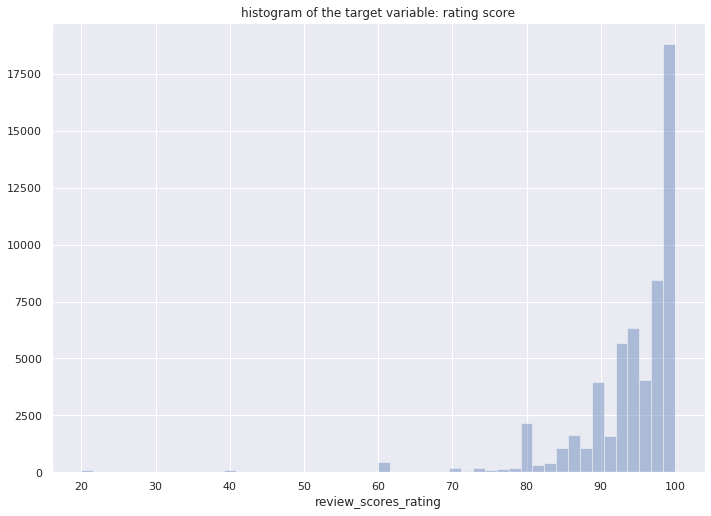

In [132]:
#y.hist(bins=40)
sns.distplot(y, kde = False)
plt.title('histogram of the target variable: rating score')
plt.savefig('y_hist.png',dpi=300)
plt.show()

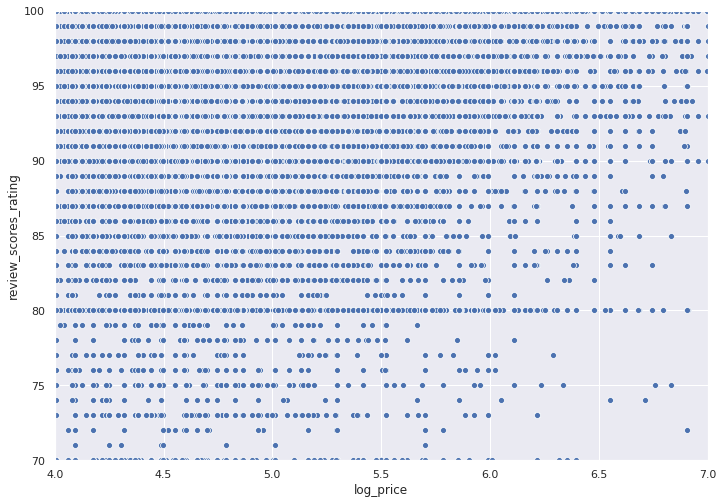

In [95]:
#tips = sns.load_dataset(result)
ax = sns.scatterplot(x="log_price", y="review_scores_rating", data=bnb3)
plt.ylim(70, 100)
plt.xlim(4, 7)
plt.savefig('priceVsrating.png',dpi=300)



In [26]:
result['bbratio']=result['beds']/(result['bedrooms']+1)

In [27]:
result['bbratio2']=result['bathrooms']/(result['bedrooms']+1)

In [28]:
result['bbratio3']=result['bathrooms']/(result['beds']+1)

In [29]:
result['review_scores_rating']

0        100.0
1         93.0
2         92.0
3         40.0
4        100.0
         ...  
57242    100.0
57243     91.0
57244     93.0
57245     94.0
57246     96.0
Name: review_scores_rating, Length: 57247, dtype: float64

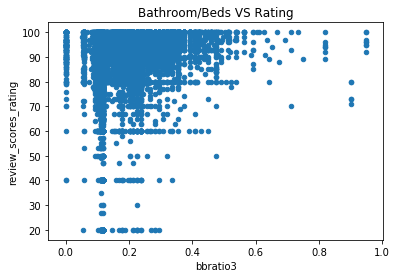

In [34]:
result.plot.scatter('bbratio3','review_scores_rating') # the color and size of each point can also be defined
#plt.ylim(0.8, 1)
#plt.xlim(-2, 0)
plt.title('Bathroom/Beds VS Rating')
plt.savefig('bbratio3vsratingscatter.png',dpi=300)

plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


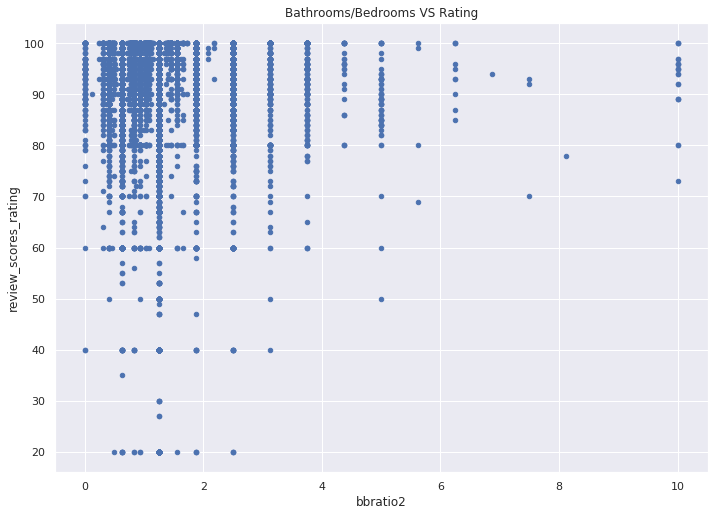

In [46]:
result.plot.scatter('bbratio2','review_scores_rating') # the color and size of each point can also be defined
#plt.ylim(0.8, 1)
#plt.xlim(-2, 0)
plt.title('Bathrooms/Bedrooms VS Rating')
plt.savefig('bbratio2vsratingscatter.png',dpi=300)

plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


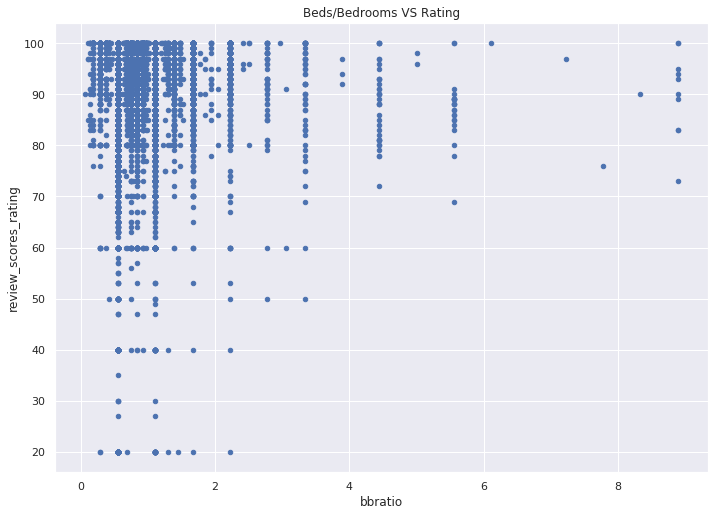

In [47]:
result.plot.scatter('bbratio','review_scores_rating') # the color and size of each point can also be defined
#plt.ylim(0.8, 1)
#plt.xlim(-2, 0)
plt.title('Beds/Bedrooms VS Rating')
plt.savefig('bbratiovsratingscatter.png',dpi=300)

plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


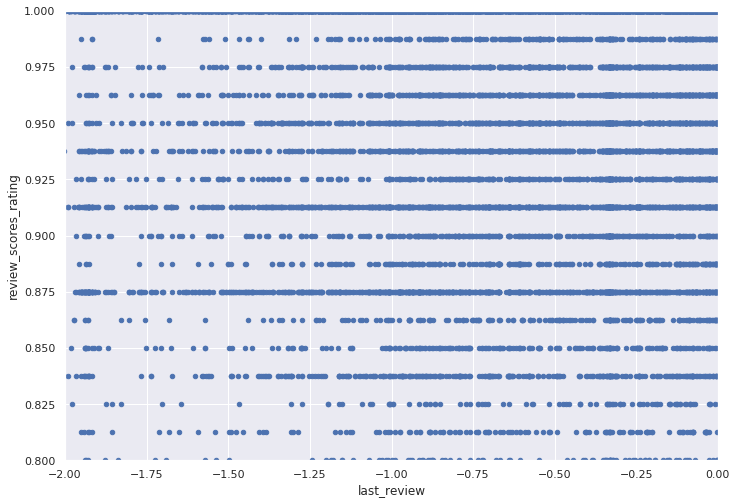

In [96]:
result.plot.scatter('last_review','review_scores_rating') # the color and size of each point can also be defined
plt.ylim(0.8, 1)
plt.xlim(-2, 0)
plt.savefig('lastreviewvsratingscatter.png',dpi=300)

plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


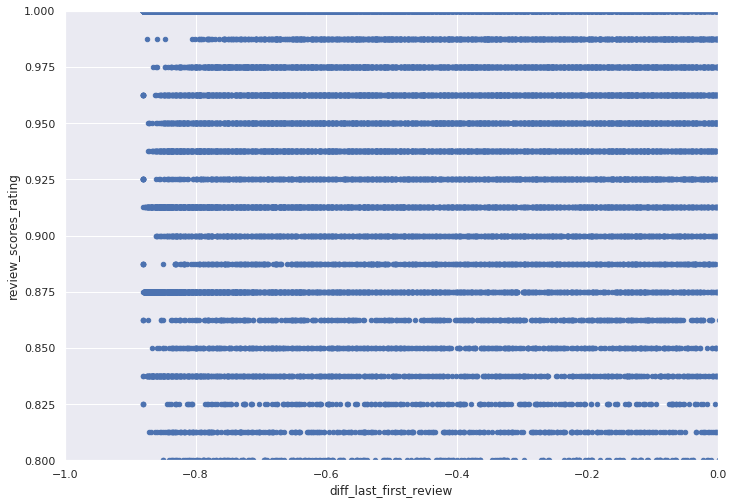

In [97]:
result.plot.scatter('diff_last_first_review','review_scores_rating') # the color and size of each point can also be defined
plt.ylim(0.8, 1)
plt.xlim(-1, 0)
plt.savefig('diffreviewvsratingscatter.png',dpi=300)

plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


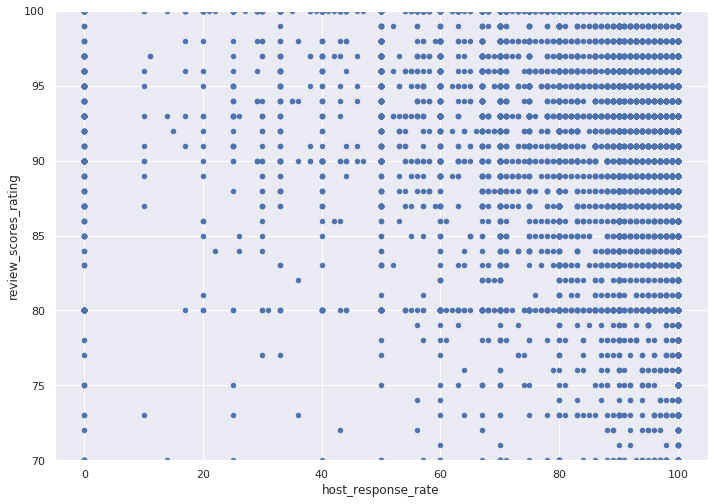

In [98]:
bnb3.plot.scatter('host_response_rate','review_scores_rating') # the color and size of each point can also be defined

#plt.xlim(90,None)
plt.ylim(70,100)
plt.savefig('responseratevsratingscatter.png',dpi=300)
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


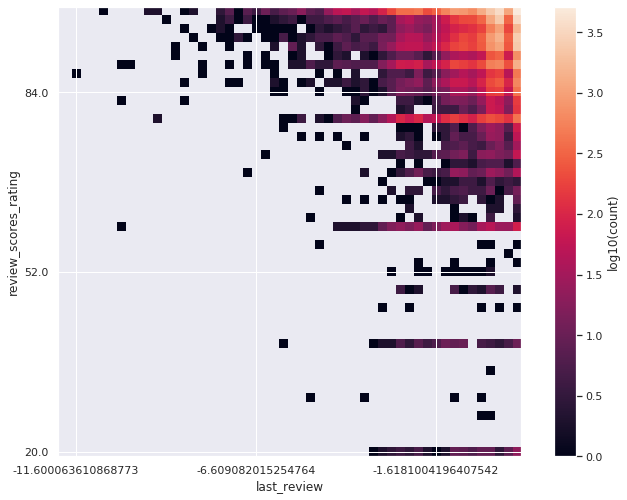

In [38]:
import numpy as np

heatmap, xedges, yedges = np.histogram2d(result['last_review'], result['review_scores_rating'], bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.imshow(np.log10(heatmap.T), origin='lower')
plt.xlabel('last_review')
plt.ylabel('review_scores_rating')
plt.xlim(-2,None)
#plt.ylim(60,None)
plt.xticks(np.arange(50)[::20],xedges[::20])
plt.yticks(np.arange(50)[::20],yedges[::20])
plt.colorbar(label='log10(count)')
plt.savefig('lastreview&ratingheatmap.png',dpi=300)
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


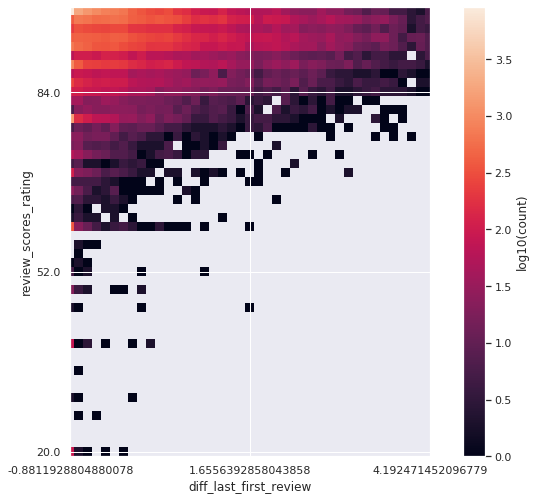

In [40]:
heatmap, xedges, yedges = np.histogram2d(result['diff_last_first_review'], result['review_scores_rating'], bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.imshow(np.log10(heatmap.T), origin='lower')
plt.xlabel('diff_last_first_review')
plt.ylabel('review_scores_rating')
plt.xlim(0,1.5)
plt.xticks(np.arange(50)[::20],xedges[::20])
plt.yticks(np.arange(50)[::20],yedges[::20])
plt.colorbar(label='log10(count)')
plt.savefig('diffreview&ratingheatmap.png',dpi=300)
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


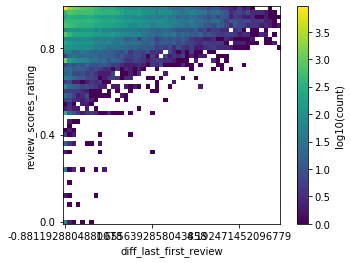

In [35]:

heatmap, xedges, yedges = np.histogram2d(result['diff_last_first_review'], result['review_scores_rating'], bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.imshow(np.log10(heatmap.T), origin='lower')
plt.xlabel('diff_last_first_review')
plt.ylabel('review_scores_rating')
plt.xticks(np.arange(50)[::20],xedges[::20])
plt.yticks(np.arange(50)[::20],yedges[::20])
plt.colorbar(label='log10(count)')
plt.savefig('diffreview&ratingheatmap.png',dpi=300)
plt.show()

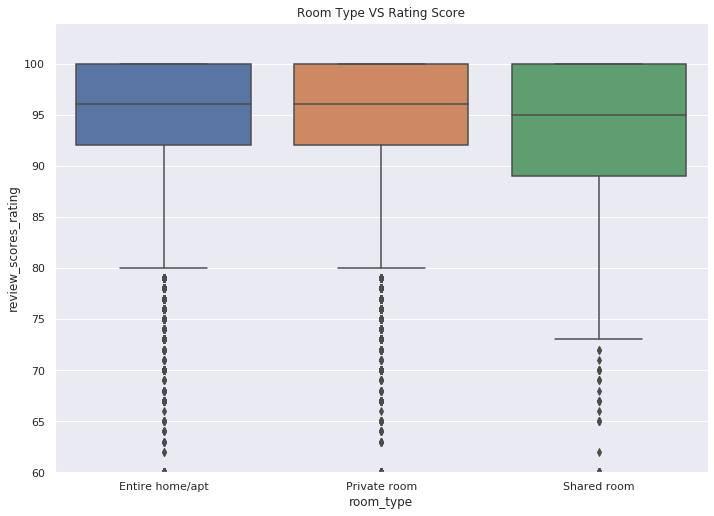

In [83]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

some = bnb3[['review_scores_rating','room_type']]
sns.boxplot(some['room_type'], some['review_scores_rating'])#.boxplot(by = 'beds')
plt.ylabel('review_scores_rating')
plt.ylim(60,None)
plt.title('Room Type VS Rating Score')
plt.savefig('_roomtypevsratingsboxplot.png',dpi=300)


plt.show()

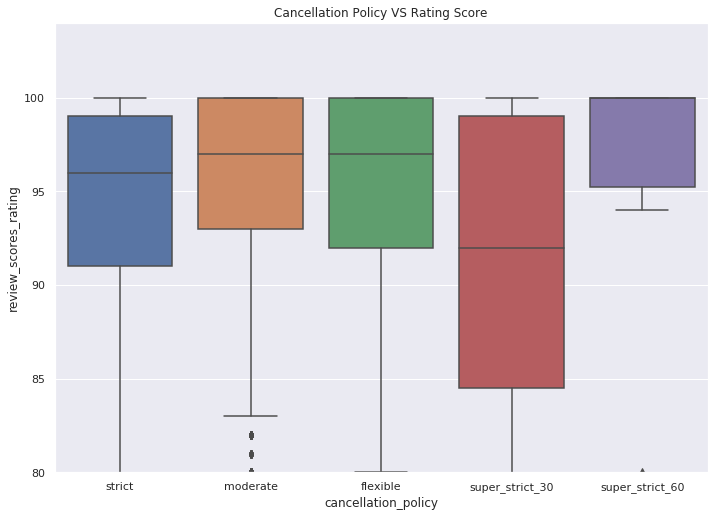

In [84]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

some = bnb3[['review_scores_rating','cancellation_policy']]
sns.boxplot(some['cancellation_policy'], some['review_scores_rating'])#.boxplot(by = 'beds')
plt.ylabel('review_scores_rating')

plt.title('Cancellation Policy VS Rating Score')
plt.ylim(80,None)
plt.savefig('canpolicvsratingsboxplot.png',dpi=300)
plt.show()

In [96]:
#Use the mutual information to select the top 10 most important features and print their names. 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.feature_selection import SelectKBest

y = result['review_scores_rating'].values # the target variable
result.drop(columns=['review_scores_rating'],inplace=True)
X = result.values # the feature matrix
feature_names = result.columns # feature names



mi_select = SelectKBest(mutual_info_regression,k=10)
X_mi = mi_select.fit_transform(X,y)

f1=feature_names[mi_select.get_support()]
f1

Index(['log_price', 'host_response_rate', 'latitude', 'longitude',
       'number_of_reviews', 'first_review', 'last_review',
       'diff_last_first_review', 'x3_flexible', 'x3_strict'],
      dtype='object')

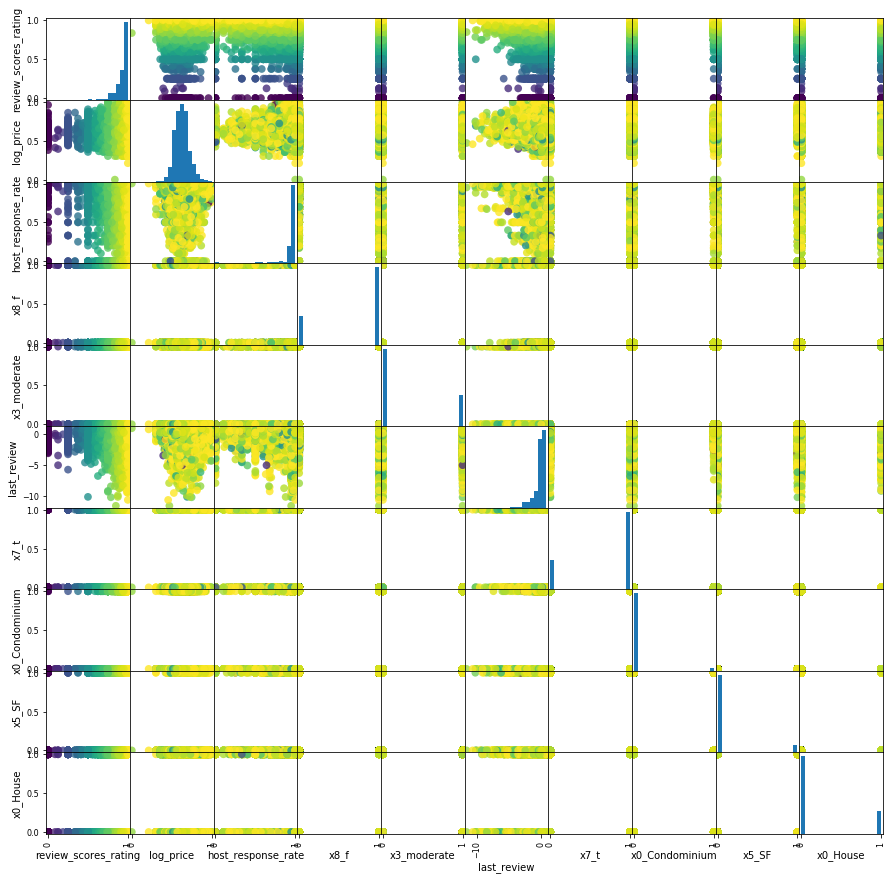

In [50]:
corrmat = result.corr()

all_cols = corrmat.sort_values('review_scores_rating',ascending=False)['review_scores_rating'].index 
cols = all_cols[:10] # positively correlated features
#cols = ['SalePrice']+[col for col in all_cols if '_nan' not in col][:-10:-1] # negatively correlated features

pd.plotting.scatter_matrix(result[cols],c = result['review_scores_rating'], figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8)
plt.savefig('scatter_matrix_dummies.png',dpi=300)
plt.show()

v=['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
   'hours-per-week']
pd.plotting.scatter_matrix(df_preprocessed[v],c = df_preprocessed['gross-income'], figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8)

plt.show()

In [29]:
print(bnb['property_type'].value_counts()/bnb['property_type'].shape)

Apartment             0.661211
House                 0.222787
Condominium           0.035865
Townhouse             0.022831
Loft                  0.016786
Other                 0.008190
Guesthouse            0.006720
Bed & Breakfast       0.006234
Bungalow              0.004939
Villa                 0.002415
Dorm                  0.001916
Guest suite           0.001660
Camper/RV             0.001268
Timeshare             0.001039
Cabin                 0.000972
In-law                0.000958
Hostel                0.000945
Boutique hotel        0.000931
Boat                  0.000877
Serviced apartment    0.000283
Tent                  0.000243
Castle                0.000175
Vacation home         0.000148
Yurt                  0.000121
Hut                   0.000108
Treehouse             0.000094
Chalet                0.000081
Earth House           0.000054
Tipi                  0.000040
Cave                  0.000027
Train                 0.000027
Island                0.000013
Lighthou

In [31]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import Lasso 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVR 
from sklearn.metrics import mean_squared_error
df=result[:10000]
df.dropna(inplace=True) 
df.reset_index(drop=True, inplace=True)
label='review_scores_rating'
df = df.astype(float) 
y = df[label] 
X = df.drop(columns=[label]) 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
def ML_pipeline_kfold_random_forest(X, y, random_state, n_folds): 
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state) 
    test_scores = [] 
    best_paras = [] 
    kf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=random_state) 

    for train_index, CV_index in kf.split(X_other, y_other): 
        X_train, X_CV = X_other.iloc[train_index.tolist()], X_other.iloc[CV_index.tolist()] 
        y_train, y_CV = y_other.iloc[train_index.tolist()], y_other.iloc[CV_index.tolist()] 

        paras = [(d, s) for d in range(3, 10) for s in range(3, 15)] 
        CV_score = [] 
        clfs = [] 
        mse=[]

    for d, s in paras: 
        clf = RandomForestRegressor(n_estimators=100, random_state=random_state,max_depth=d, min_samples_split=s) 
        clf.fit(X_train, y_train) 
        #CV_score.append(clf.score(X_CV, y_CV))
        mse.append(mean_squared_error(y_CV,clf.predict(X_CV)))
        clfs.append(clf) 
        #best_d = paras[np.argmax(CV_score)][0] 
        #best_s = paras[np.argmax(CV_score)][1]
        best_d = paras[np.argmin(mse)][0] 
        best_s = paras[np.argmin(mse)][1]
        best_paras.append((best_d, best_s)) 
        #clf = clfs[np.argmax(CV_score)] 
        clf = clfs[np.argmin(mse)]
        #test_scores.append(mean_squared_error(y_test,clf.predict(X_test))) 
        test_scores.append(clf.score(X_test,y_test))
        best_para = best_paras[np.argmax(test_scores)] 
    return best_para, min(mse), max(test_scores) 


In [36]:
test_scores_rf = [] 
for i in range(10): 
    random_state = 42*i 
    best_para, best_mse, test_score = ML_pipeline_kfold_random_forest(X, y, random_state, 5) 
    test_scores_rf.append(test_score) 
    print('random state = {}. Best max_depth is {} and best min_samples_split is {}. MSE is {}. Best score is {}'.format(random_state,best_para[0], best_para[1], best_mse, max(test_scores_rf))) 
mean_rf = np.mean(test_scores_rf) 
std_rf = np.std(test_scores_rf) 
print('test accuracy score:', np.around(mean_rf,3), '+/-', np.around(std_rf,3))

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


random state = 0. Best max_depth is 6 and best min_samples_split is 10. MSE is 61.694854114375296. Best score is 0.052595906418687166


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


random state = 42. Best max_depth is 5 and best min_samples_split is 13. MSE is 59.17800327644667. Best score is 0.052595906418687166


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


random state = 84. Best max_depth is 3 and best min_samples_split is 3. MSE is 62.16369033631072. Best score is 0.052595906418687166


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


random state = 252. Best max_depth is 7 and best min_samples_split is 3. MSE is 61.43422265113587. Best score is 0.052595906418687166


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


random state = 294. Best max_depth is 7 and best min_samples_split is 3. MSE is 57.68473146354411. Best score is 0.08345336272253245


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


random state = 336. Best max_depth is 4 and best min_samples_split is 3. MSE is 59.711522475637. Best score is 0.08345336272253245


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


random state = 378. Best max_depth is 7 and best min_samples_split is 3. MSE is 59.08565530495987. Best score is 0.08345336272253245
test accuracy score: 0.036 +/- 0.019


In [65]:
from sklearn import linear_model
def ML_pipeline_kfold_lasso(X, y, random_state, n_folds): 
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2,random_state = random_state) 
    test_scores = [] 
    best_paras = [] 
    kf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=random_state) 

    for train_index, CV_index in kf.split(X_other, y_other): 
        X_train, X_CV = X_other.iloc[train_index.tolist()], X_other.iloc[CV_index.tolist()] 
        y_train, y_CV = y_other.iloc[train_index.tolist()], y_other.iloc[CV_index.tolist()] 
        paras = np.logspace(-4, 4, 20) 
        mse = [] 
        clfs = [] 
        for a in paras: 
            clf = linear_model.Lasso(alpha=a,max_iter=1e4)
            clf.fit(X_train, y_train) 
            #mse.append(clf.score(X_CV, y_CV))
            mse.append(mean_squared_error(y_CV,clf.predict(X_CV)))
            clfs.append(clf) 
        best_a = paras[np.argmin(mse)]
         
        best_paras.append(best_a) 
        clf = clfs[np.argmin(mse)] 
        test_scores.append(clf.score(X_test,y_test))
    best_para = best_paras[np.argmax(test_scores)] 
    return best_para, min(mse), max(test_scores)

In [66]:
test_scores_lasso = [] 
for i in range(10): 
    random_state = 42*i 
    best_para, best_mse,test_score = ML_pipeline_kfold_lasso(X, y, random_state, 5) 
    #print(test_score)
    test_scores_lasso.append(test_score) 
    print('random state = {}. Best alpha is {}. MSE is {}. Best score is {}'.format(random_state, best_para,best_mse,max(test_scores_lasso))) 

mean_svr = np.mean(test_scores_lasso) 
std_svr = np.std(test_scores_lasso) 
print('test accuracy score:', np.around(mean_svr,3), '+/-', np.around(std_svr,3))

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 153.41649722511647, tolerance: 42.72522989223794
  positive)


random state = 0. Best alpha is 0.0018329807108324356. MSE is 62.681213048381984. Best score is 0.06088034731719283


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113.71303643856663, tolerance: 41.772868393944144
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73.12523333140416, tolerance: 42.0633511069535
  positive)


random state = 42. Best alpha is 0.004832930238571752. MSE is 58.37212369365041. Best score is 0.06088034731719283


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 152.65605077747023, tolerance: 43.036579721483314
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1791.7049511415535, tolerance: 43.34658243750002
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 

random state = 84. Best alpha is 0.0018329807108324356. MSE is 60.07019862547375. Best score is 0.06088034731719283


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1869.58129654394, tolerance: 44.5401920900422
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 245.20389189285925, tolerance: 44.51599353023909
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5295

random state = 126. Best alpha is 0.004832930238571752. MSE is 67.4713035577557. Best score is 0.06088034731719283


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95.50667951820651, tolerance: 42.82287821456532
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 486.6884365535807, tolerance: 43.82429853262563
  positive)


random state = 168. Best alpha is 0.0001. MSE is 61.958503962797224. Best score is 0.06088034731719283


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55.99623948719818, tolerance: 41.14657354323314
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3462.693271379976, tolerance: 42.36068296840785
  positive)


random state = 210. Best alpha is 0.00026366508987303583. MSE is 60.23773313055854. Best score is 0.06088034731719283


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 251.25319488940295, tolerance: 42.41016974527262
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 230.34174201037968, tolerance: 43.401933348924246
  positive)


random state = 252. Best alpha is 0.012742749857031334. MSE is 59.79960182135998. Best score is 0.06088034731719283


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 887.1336761086714, tolerance: 42.01338707408563
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1586.667047084542, tolerance: 41.483714522432386
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58

random state = 294. Best alpha is 0.00026366508987303583. MSE is 57.51133673543508. Best score is 0.06088034731719283


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1604.7853372604004, tolerance: 43.09938415470989
  positive)


random state = 336. Best alpha is 0.004832930238571752. MSE is 60.09415589220725. Best score is 0.06088034731719283


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


random state = 378. Best alpha is 0.0001. MSE is 59.8084455978399. Best score is 0.06088034731719283
test accuracy score: 0.05 +/- 0.007


In [45]:
from sklearn import linear_model
def ML_pipeline_kfold_ridge(X, y, random_state, n_folds): 
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2,random_state = random_state) 
    test_scores = [] 
    best_paras = [] 
    kf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=random_state) 

    for train_index, CV_index in kf.split(X_other, y_other): 
        X_train, X_CV = X_other.iloc[train_index.tolist()], X_other.iloc[CV_index.tolist()] 
        y_train, y_CV = y_other.iloc[train_index.tolist()], y_other.iloc[CV_index.tolist()] 
        paras = np.logspace(-4, 4, 20) 
        mse = [] 
        clfs = [] 
        for a in paras: 
            clf = linear_model.Ridge(alpha=a)
            clf.fit(X_train, y_train) 
            #mse.append(clf.score(X_CV, y_CV))
            mse.append(mean_squared_error(y_CV,clf.predict(X_CV)))
            clfs.append(clf) 
        best_a = paras[np.argmin(mse)]
         
        best_paras.append(best_a) 
        clf = clfs[np.argmin(mse)] 
        test_scores.append(clf.score(X_test,y_test))
    best_para = best_paras[np.argmin(test_scores)] 
    return best_para, min(mse), max(test_scores)

In [46]:
test_scores_ridge = [] 
for i in range(10): 
    random_state = 42*i 
    best_para, best_mse,test_score = ML_pipeline_kfold_ridge(X, y, random_state, 5) 
    #print(test_score)
    test_scores_ridge.append(test_score) 
    print('random state = {}. Best alpha is {}. MSE is {}. Best score is {}'.format(random_state, best_para,best_mse,max(test_scores_lasso))) 

mean_svr = np.mean(test_scores_ridge) 
std_svr = np.std(test_scores_ridge) 
print('test accuracy score:', np.around(mean_svr,3), '+/-', np.around(std_svr,3))

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


random state = 0. Best alpha is 0.0001. MSE is 62.835200201783834. Best score is 0.06088034731719283


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


random state = 42. Best alpha is 206.913808111479. MSE is 58.32816372601179. Best score is 0.06088034731719283


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


random state = 84. Best alpha is 0.08858667904100823. MSE is 60.060194706049394. Best score is 0.06088034731719283


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


random state = 126. Best alpha is 11.288378916846883. MSE is 67.76214400035875. Best score is 0.06088034731719283


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


random state = 168. Best alpha is 4.281332398719396. MSE is 62.088964820402836. Best score is 0.06088034731719283


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


random state = 210. Best alpha is 0.615848211066026. MSE is 60.17353623456211. Best score is 0.06088034731719283


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


random state = 252. Best alpha is 11.288378916846883. MSE is 60.072082115497636. Best score is 0.06088034731719283


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


random state = 294. Best alpha is 0.615848211066026. MSE is 57.40342634353917. Best score is 0.06088034731719283


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


random state = 336. Best alpha is 0.004832930238571752. MSE is 60.11378264579332. Best score is 0.06088034731719283


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


random state = 378. Best alpha is 29.763514416313132. MSE is 59.56782272566426. Best score is 0.06088034731719283
test accuracy score: 0.048 +/- 0.007


In [64]:
def ML_pipeline_kfold_svr(X, y, random_state, n_folds): 
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2,random_state = random_state) 
    test_scores = [] 
    best_paras = [] 
    kf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=random_state) 

    for train_index, CV_index in kf.split(X_other, y_other): 
        X_train, X_CV = X_other.iloc[train_index.tolist()], X_other.iloc[CV_index.tolist()] 
        y_train, y_CV = y_other.iloc[train_index.tolist()], y_other.iloc[CV_index.tolist()] 
        
        C = np.logspace(-3, 5, 5) 
        gamma = np.logspace(-10, 3, 5) 
        paras = [(c, g) for c in C for g in gamma] 
        CV_score = [] 
        mse=[]
        clfs = [] 
        for c, g in paras: 
            clf = SVR(C=c, gamma=g) 
            clf.fit(X_train, y_train) 
            #CV_score.append(clf.score(X_CV, y_CV)) 
            mse.append(mean_squared_error(y_CV,clf.predict(X_CV)))
            clfs.append(clf) 
        #best_c = paras[np.argmax(CV_score)][0] 
        #best_g = paras[np.argmax(CV_score)][1]
        best_c = paras[np.argmin(mse)][0] 
        best_g = paras[np.argmin(mse)][1] 
        best_paras.append((best_c, best_g)) 
        #clf = clfs[np.argmax(CV_score)]
        clf = clfs[np.argmin(mse)]
        test_scores.append(clf.score(X_test,y_test))
    best_para = best_paras[np.argmax(test_scores)] 
    return best_para, min(mse), max(test_scores)


In [65]:
test_scores_svr = [] 
for i in range(3): 
    random_state = 42*i 
    best_para, best_mse, test_score = ML_pipeline_kfold_svr(X, y, random_state, 5) 
    test_scores_svr.append(test_score) 
    print('random state = {}. Best C is {} and best gamma is {}. MSE is {}. Best score is {}'.format(random_state, best_para[0], best_para[1],best_mse,max(test_scores_svr))) 

mean_svr = np.mean(test_scores_svr) 
std_svr = np.std(test_scores_svr) 
print('test accuracy score:', np.around(mean_svr,3), '+/-', np.around(std_svr,3))

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


random state = 0. Best C is 1000.0 and best gamma is 1000.0. MSE is 65.87396011164893. Best score is 9.088586371019947e-05


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


random state = 42. Best C is 1000.0 and best gamma is 1000.0. MSE is 60.3781483275157. Best score is 0.001099139587094733


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


KeyboardInterrupt: 

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import xgboost as xgb

def ML_pipeline_XGB(X,y,random_state):
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    test_scores = []
    test_MSE = []
    bestpara_opt = []
    kf = KFold(n_splits=5,shuffle=True,random_state=random_state)

    for train_index, CV_index in kf.split(X_other,y_other):
        X_train, X_CV = X_other.iloc[train_index.tolist()], X_other.iloc[CV_index.tolist()]
        y_train, y_CV = y_other.iloc[train_index.tolist()], y_other.iloc[CV_index.tolist()]

        X#_train_df,X_c_df,X_t_df = split_preprocess(X_train,X_CV,X_test,random_state)

        depth = [3,30,100]
        rate = [0.01, 0.05, 0.1, 0.3]
        d_w = [(d,w) for d in depth for w in rate]
        CV_score_xgb = []
        xgbs = []

        for d,w in d_w:
            gbm = xgb.XGBRegressor(n_estimators=20000,
                           max_depth=d,
                           objective="reg:squarederror",
                           learning_rate=w,
                           subsample=1,
                           min_child_weight=3,
                           colsample_bytree=0.8)
            
            clf = gbm.fit(X_train, y_train, eval_set=[(X_train,y_train),(X_CV,y_CV)],early_stopping_rounds=50,verbose=False)
            CV_score_xgb.append(clf.score(X_CV,y_CV))
            xgbs.append(clf)
        
        best_xgb = max(CV_score_xgb)
        bestpara_opt.append(d_w[CV_score_xgb.index(best_xgb)])
        
        # grab the best model
        best_xgb = xgbs[np.argmax(CV_score_xgb)]
        # calculate test score using the best model
        test_scores.append(best_xgb.score(X_test, y_test))
        test_MSE.append(mean_squared_error(y_test,best_xgb.predict(X_test)))
    best_para = bestpara_opt[np.argmax(test_scores)]
    return best_para, max(test_scores), test_MSE

In [40]:
test_scores = []
test_MSEs = []

for i in [2,3,4]:
    best_para, test_score, test_MSE = ML_pipeline_XGB(X,y,i*42)
    test_scores.append(test_score)
    test_MSEs.append(test_MSE)
    print('random_state:', i*42, 'best depth:', best_para[0],'best weight:', best_para[1],'score:', max(test_scores))

print('test score:',np.around(np.mean(test_scores),3),'+/-',np.around(np.std(test_scores),3))
print('test MSE:',np.around(np.mean(test_MSEs),3),'+/-',np.around(np.std(test_MSEs),3))

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

random_state: 84 best depth: 3 best weight: 0.01 score: 0.047921015761081986


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

random_state: 126 best depth: 3 best weight: 0.05 score: 0.05838788880756706


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/x

random_state: 168 best depth: 3 best weight: 0.1 score: 0.05838788880756706
test score: 0.055 +/- 0.005
test MSE: 54.471 +/- 4.071


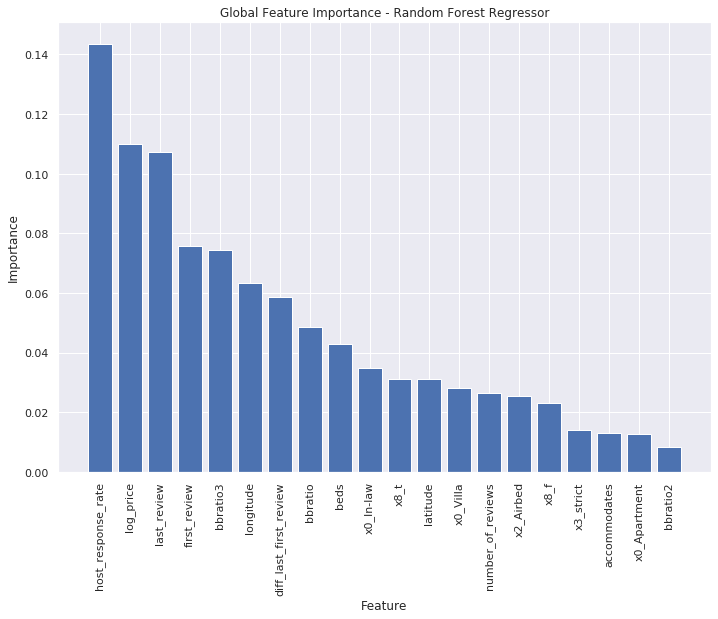

In [63]:
features_df = pd.DataFrame()
features_df['Features'] = X_train.columns
clf_rf = RandomForestRegressor(n_estimators=100, random_state=294, max_depth=ds[ind], min_samples_split=ss[ind])
clf_rf.fit(X_train, y_train)
features_df['Importance'] = clf_rf.feature_importances_
features_df = features_df.sort_values('Importance', ascending=False)
plt.bar(range(20), features_df['Importance'][0:20])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Global Feature Importance - Random Forest Regressor")
plt.xticks(range(20), features_df['Features'][0:20], rotation='vertical')
plt.savefig('global_ftr_importance_rf', dpi=300, bbox_inches = "tight")
plt.show()